### 목표
 - iris데이터를 활용해서 붓꽃 품종을 분류해보자
 - 인공신경망으로 다중분류 문제를 해결해보자

In [3]:
# 환경셋팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
iris
# 번치객체 , 딕셔너리 형식 활용

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# key값들 확인해보기
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# 데이터 분리(문제와 답)
X = iris['data']
y = iris['target']
# iris.data, iris.target
# 크기확인
print(X.shape, y.shape)

(150, 4) (150,)


In [7]:
# 훈련셋, 테스트셋 분리
# 7.5, 2.5, 랜덤 고정 2
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,
                                                    random_state = 2)

# 크기 확인
print('훈렷셋:', X_train.shape, y_train.shape)
print('테스트셋:', X_test.shape, y_test.shape)

훈렷셋: (112, 4) (112,)
테스트셋: (38, 4) (38,)


In [8]:
# 다중분류에서는 정답 데이터를 원핫 인코딩 해줘야한다!
# pd.get_dummies(대상) -> DataFrame
# to_categorical(대상) -> array
from tensorflow.keras.utils import to_categorical
y_train_oh = to_categorical(y_train) # 훈련 답
y_test_oh = to_categorical(y_test) # 훈련 답
y_train_oh


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0

#### keras 인공신경망 생성!
- 1. 신경망 구조 설계
  - 뼈대 구축, 층 내용 정의
  - 출력층
    회귀 : units = 1 , a = ' linear'(생략)
    이진 : units = 1 , a = 'sigmoid'
    다중 : units = 클래스 개수 만큼, a = 'softmax'
- 2. 학습/평가 방법 설정
  - 회귀: 'mse'
  - 이진분류: 'binary_crossentropy'
  - 다중분류: 'categorical_crossentropy'
- 3. 학습 및 현황 시각화

- 4. 예측 및 평가

In [9]:
# 뼈대 구축
model = Sequential()
# 입력층 + 중간층1, sigmoid
model.add(Dense(units = 16, input_dim = 4, activation = 'relu'))
# 중간층 2개, sigmoid
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 4, activation = 'relu'))
# 출력층, softmax
model.add(Dense(units = 3, activation = 'softmax'))
# 모델 정보 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
Total params: 267 (1.04 KB)
Trainable params: 267 (1.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# 2. 학습 / 평가 방법 설정

# 컴파일 (다중 분류 작업에 맞게 설정)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 3. 모델 학습 및 시각화

h = model.fit(X_train, y_train_oh, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 1.0918 - accuracy: 0.0357
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0624 - accuracy: 0.3125
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0500 - accuracy: 0.3304
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0445 - accuracy: 0.3304
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0379 - accuracy: 0.3750
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0294 - accuracy: 0.4732
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0200 - accuracy: 0.5446
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0118 - accuracy: 0.5714
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0032 - accuracy: 0.5893
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.9923 - accuracy: 0.5893
Epoch 11/200
4/4 [===========

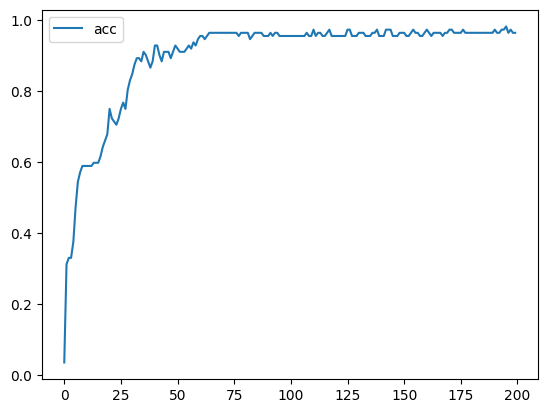

In [11]:
# accuracy 시각화
plt.plot(h.history['accuracy'], label = 'acc')
plt.legend()
plt.show()

# 반복이 조금만 진행되도 w, b 찾아가면서 성능 빠르게 개선
# optimizer 문제가 있음
# activation에 문제가 있음